In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [90]:
# Load Dataset
train = pd.read_csv("train.txt", names=["text", "emotion"], sep=';')
test = pd.read_csv("test.txt", names=["text", "emotion"], sep=';')

print("Training samples:", len(train))
print("Test samples:", len(test))
print(train['emotion'].value_counts())


Training samples: 16000
Test samples: 2000
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [92]:
# Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text.strip()

In [94]:
train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)

In [96]:
X = df['text']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [99]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)



In [102]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)


In [103]:
# Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

In [104]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate_model("Naive Bayes", y_test, y_pred_nb)
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("SVM", y_test, y_pred_svm)



=== Naive Bayes ===
Accuracy: 0.695
              precision    recall  f1-score   support

       anger       0.94      0.41      0.57       465
        fear       0.85      0.26      0.40       420
         joy       0.63      0.97      0.77      1199
        love       1.00      0.10      0.18       302
     sadness       0.72      0.93      0.81      1079
    surprise       1.00      0.01      0.03       135

    accuracy                           0.69      3600
   macro avg       0.86      0.45      0.46      3600
weighted avg       0.77      0.69      0.64      3600


=== Logistic Regression ===
Accuracy: 0.8536111111111111
              precision    recall  f1-score   support

       anger       0.93      0.77      0.84       465
        fear       0.83      0.75      0.79       420
         joy       0.82      0.95      0.88      1199
        love       0.85      0.64      0.73       302
     sadness       0.88      0.94      0.90      1079
    surprise       0.87      0.44    

In [106]:
accuracies = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

In [108]:
accuracies

{'Naive Bayes': 0.695,
 'Logistic Regression': 0.8536111111111111,
 'SVM': 0.8836111111111111}

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\789593414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


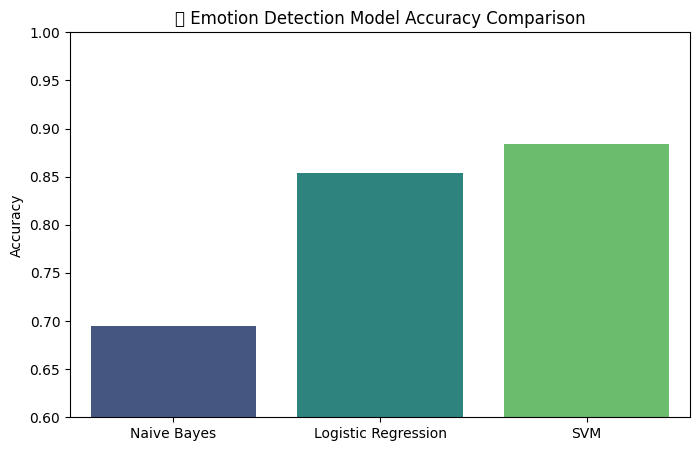

In [112]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.ylim(0.6, 1.0)
plt.title("📊 Emotion Detection Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

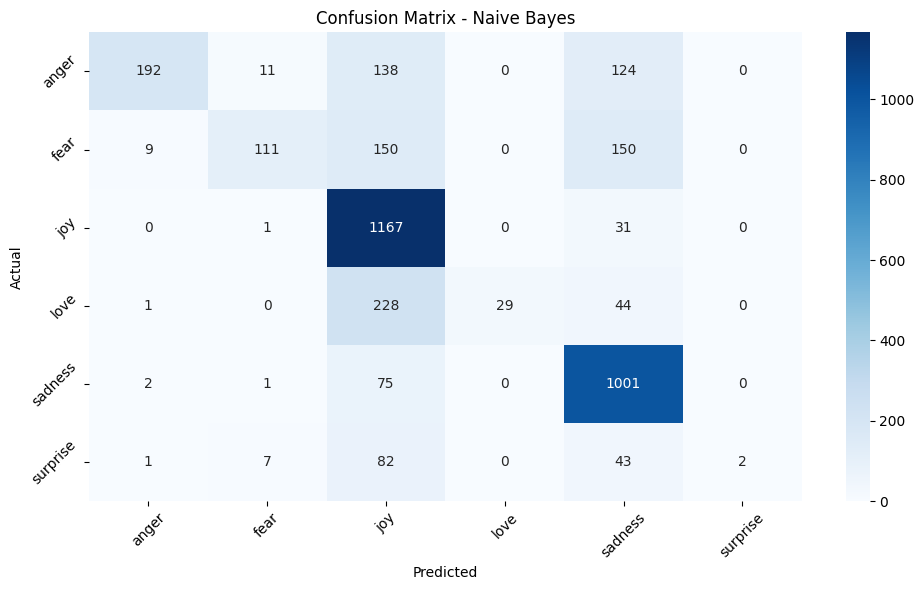

In [114]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix_nb(y_true, y_pred):
    labels = sorted(y_true.unique())
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix - Naive Bayes")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix_nb(y_test, y_pred_nb)

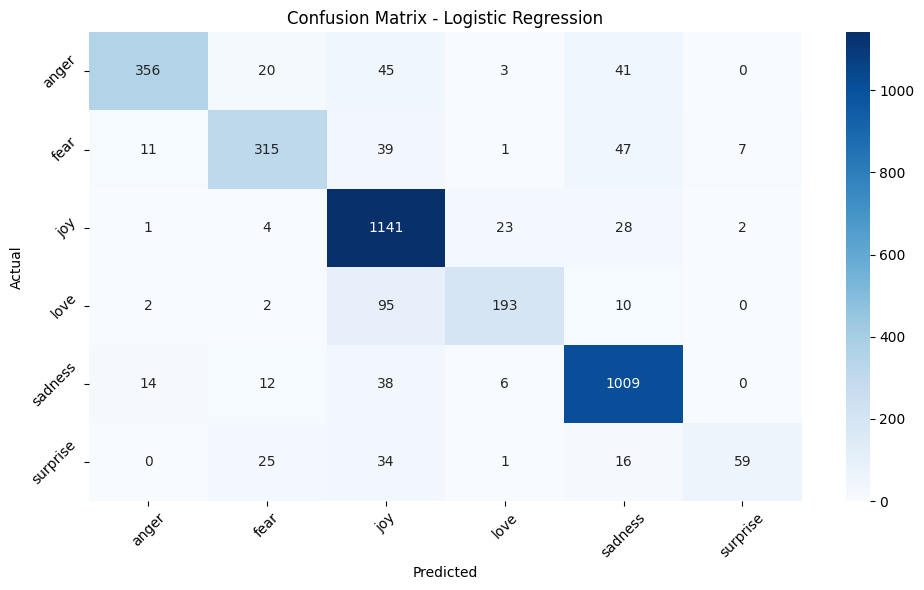

In [116]:
def plot_confusion_matrix_lr(y_true, y_pred):
    labels = sorted(y_true.unique())
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix - Logistic Regression")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix_lr(y_test, y_pred_lr)

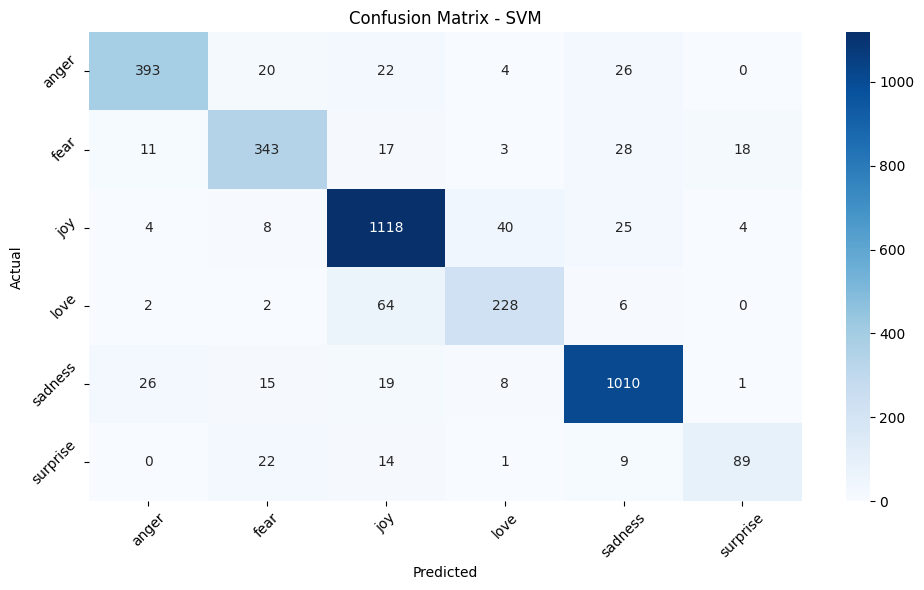

In [117]:
def plot_confusion_matrix_svm(y_true, y_pred):
    labels = sorted(y_true.unique())
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix - SVM")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix_svm(y_test, y_pred_svm)